### Tests de entrenamiento para el conjunto de datos IRIS 

Comenzamos importando todas las librerías y los módulos necesarios para poder entrenar el conjunto de datos IRIS:

In [148]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve
import matplotlib.pyplot as plt

Cargamos los datos de IRIS y preprocesamos los datos. Este dataset tiene solo tres clases (especies de iris), por lo que no necesita una red neuronal compleja:

In [149]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba:

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos una red neuronal simple agregando las siguientes capas:

In [151]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal.

In [152]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test]))
acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.13333333333333333
epoch   0 - Loss 0.10578, Accuracy 0.54167
epoch  10 - Loss 0.09654, Accuracy 0.83333
epoch  20 - Loss 0.06759, Accuracy 0.95833
epoch  30 - Loss 0.05192, Accuracy 0.95833
epoch  40 - Loss 0.04194, Accuracy 0.95833
epoch  50 - Loss 0.03510, Accuracy 0.95833
epoch  60 - Loss 0.03014, Accuracy 0.95833
epoch  70 - Loss 0.02639, Accuracy 0.95833
epoch  80 - Loss 0.02345, Accuracy 0.95833
epoch  90 - Loss 0.02110, Accuracy 0.95833
epoch 100 - Loss 0.01917, Accuracy 0.91667
epoch 110 - Loss 0.01756, Accuracy 0.91667
epoch 120 - Loss 0.01619, Accuracy 0.91667
epoch 130 - Loss 0.01502, Accuracy 0.91667
epoch 140 - Loss 0.01400, Accuracy 0.91667
epoch 150 - Loss 0.01312, Accuracy 0.91667
epoch 160 - Loss 0.01233, Accuracy 0.91667
epoch 170 - Loss 0.01163, Accuracy 0.91667
epoch 180 - Loss 0.01101, Accuracy 0.91667
epoch 190 - Loss 0.01045, Accuracy 0.91667
epoch 200 - Loss 0.00995, Accuracy 0.91667
epoch 210 - Loss 0.00948, Accuracy 0.91667
epoch 2

El accuracy después del entrenamiento es el siguiente:

In [153]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.9666666666666667


Obtenemos un 97% de precisión se puede deber a que el dataset de iris es pequeño y esta bien estructurado, con lo cual modelos simples como este pueden alcanzar una alta precisión sin dificultad.

A continuación, podemos visualizar la matriz de confusión tras calcular la precisión:

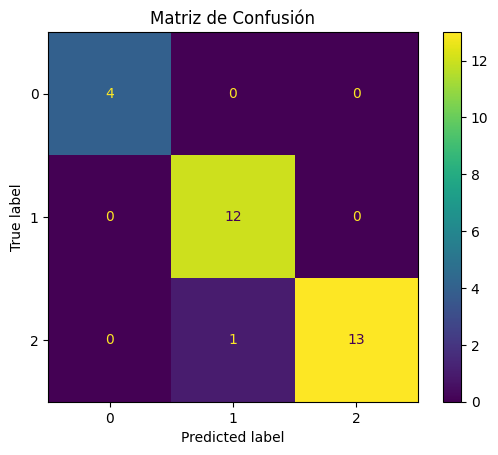

In [154]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

La matriz de confusión revela un desempeño casi excepcional del modelo. Todas las instancias han sido clasificadas correctamente en sus respectivas clases.

A continuación, diseñaremos un modelo de red neuronal más complejo para comprobar si obtiene o no la misma precisión. Al incrementar el número de capas y neuronas en comparación con nuestro primer modelo, buscamos observar si ayuda al modelo a alcanzar una gran precisión o si existe el riesgo de sobreajuste en un dataset relativamente pequeño como el Iris. La nueva red neuronal está compuesta por las siguientes capas: 

In [155]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(4, 20, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(20, 10, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(10, 6, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [156]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.13333333333333333
epoch   0 - Loss 0.01797, Accuracy 0.75000
epoch  10 - Loss 0.00726, Accuracy 0.79167
epoch  20 - Loss 0.00460, Accuracy 0.83333
epoch  30 - Loss 0.00301, Accuracy 0.87500
epoch  40 - Loss 0.00215, Accuracy 0.87500
epoch  50 - Loss 0.00170, Accuracy 0.87500
epoch  60 - Loss 0.00141, Accuracy 0.87500
epoch  70 - Loss 0.00120, Accuracy 0.87500
epoch  80 - Loss 0.00104, Accuracy 0.87500
epoch  90 - Loss 0.00092, Accuracy 0.87500
epoch 100 - Loss 0.00083, Accuracy 0.87500
epoch 110 - Loss 0.00075, Accuracy 0.87500
epoch 120 - Loss 0.00068, Accuracy 0.87500
epoch 130 - Loss 0.00063, Accuracy 0.87500
epoch 140 - Loss 0.00058, Accuracy 0.87500
epoch 150 - Loss 0.00054, Accuracy 0.87500
epoch 160 - Loss 0.00050, Accuracy 0.87500
epoch 170 - Loss 0.00047, Accuracy 0.87500
epoch 180 - Loss 0.00044, Accuracy 0.87500
epoch 190 - Loss 0.00042, Accuracy 0.87500
epoch 200 - Loss 0.00040, Accuracy 0.87500
epoch 210 - Loss 0.00038, Accuracy 0.87500
epoch 2

In [157]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9333333333333333


Los resultados obtenidos muestran que el modelo nn2 alcanzó una precisión del 93% en el conjunto de prueba, lo cual representa una ligera disminución en comparación con el modelo más simple que alcanzó un 97% de precisión. Esta reducción en precisión podría deberse a un leve sobreajuste, ya que el conjunto de datos Iris, al ser pequeño y altamente separable, no necesariamente requiere una red tan profunda y parametrizada.

A continuación, dibujaremos la matriz de confusión para ver donde el modelo no clasificó correctamente las instancias:

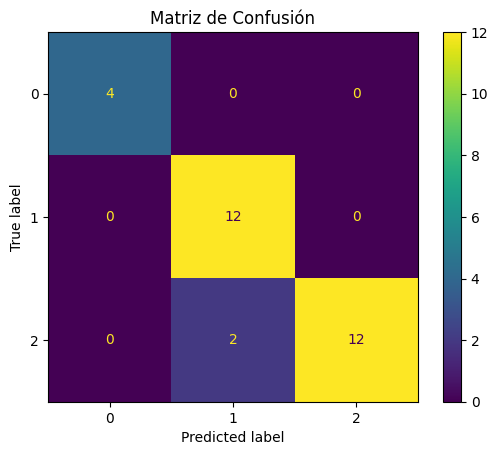

In [158]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

La matriz de confusión del segundo modelo muestra un rendimiento notable. Se han clasificado correctamente todas las instancias de la clase 0 (4) y clase 1 (12). Sin embargo, el modelo confunde dos instancias de la clase 2 con la clase 1.

Para evaluar la influencia de un modelo complejo de red neuronal en la precisión sobre el conjunto de datos IRIS, hemos querido diseñar un tercer modelo, para comprobar si una red neuronal de tamaño complejo puede ofrecer una precisión alta sin riesgo de sobreajuste.

In [159]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(4, 10, activation_func=relu, activation_derivate=relu_derivate))
nn3.add_layer(Layer(10, 8, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(8, 5, activation_func=relu, activation_derivate=relu_derivate))
nn3.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [160]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test]))
acc3, loss3 = optimizers.gradient_descent(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.23333333333333334
epoch   0 - Loss 0.24471, Accuracy 0.70833
epoch  10 - Loss 0.00600, Accuracy 0.66667
epoch  20 - Loss 0.00174, Accuracy 0.75000
epoch  30 - Loss 0.00108, Accuracy 0.79167
epoch  40 - Loss 0.00172, Accuracy 0.91667
epoch  50 - Loss 0.00155, Accuracy 0.87500
epoch  60 - Loss 0.00216, Accuracy 0.87500
epoch  70 - Loss 0.00133, Accuracy 0.87500
epoch  80 - Loss 0.00080, Accuracy 0.87500
epoch  90 - Loss 0.00058, Accuracy 0.87500
epoch 100 - Loss 0.00056, Accuracy 0.87500
epoch 110 - Loss 0.00043, Accuracy 0.87500
epoch 120 - Loss 0.00036, Accuracy 0.87500
epoch 130 - Loss 0.00031, Accuracy 0.87500
epoch 140 - Loss 0.00028, Accuracy 0.87500
epoch 150 - Loss 0.00025, Accuracy 0.91667
epoch 160 - Loss 0.00023, Accuracy 0.91667
epoch 170 - Loss 0.00022, Accuracy 0.91667
epoch 180 - Loss 0.00021, Accuracy 0.87500
epoch 190 - Loss 0.00020, Accuracy 0.91667
epoch 200 - Loss 0.00019, Accuracy 0.91667
epoch 210 - Loss 0.00018, Accuracy 0.91667
epoch 2

In [161]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test): ", acc_model3)

Accuracy after training (on test):  0.9666666666666667


Este modelo alcanzó una precisión prácticamente igual en comparación con el primer modelo anterior. Este resultado refuerza nuestra hipótesis inicial de que, para el conjunto de datos Iris, una arquitectura simple es suficiente para capturar las relaciones entre las clases de manera efectiva. La reducción en la precisión en el segundo modelo, sugiere que añadir mayor profundidad y complejidad, no necesariamente aporta beneficios significativos en la clasificación de este dataset.

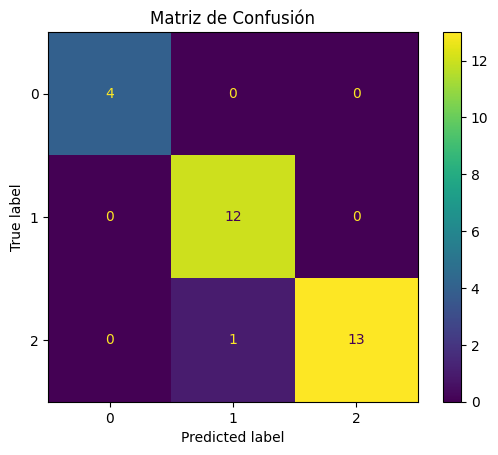

In [162]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Podemos ver que este modelo clasifica correctamente la clase 0 y 1, sin embargo, confunde la clase 2 con la 1.

Para finalizar con este test, graficaremos la precisión y la pérdida a lo largo de las épocas:

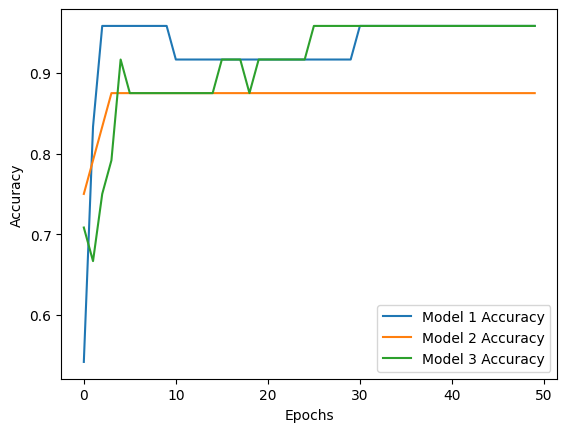

In [163]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.plot(acc3, label="Model 3 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

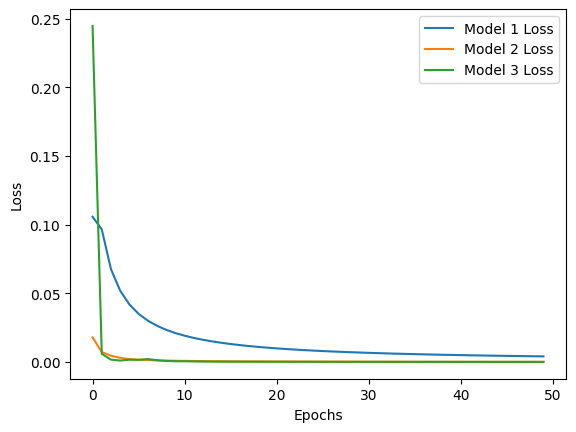

In [164]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.plot(loss3, label="Model 3 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Para finalizar con este primer conjunto de datos, haremos un último modelo haciendo uso del método de optimización del descenso de gradiente con momentum y usando de función de activación la sigmoide.

In [165]:
nn4 = NeuralNetwork()
nn4.add_layer(Layer(4, 20, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn4.add_layer(Layer(20, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn4.add_layer(Layer(10, 6, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn4.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [166]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn4.feedforward(x) for x in X_test]))
acc4, loss4 = optimizers.momentum_optimizer(nn4, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.26666666666666666
epoch   0 - Loss 1.14700, Accuracy 0.16667
epoch  10 - Loss 0.01752, Accuracy 0.87500
epoch  20 - Loss 0.00879, Accuracy 0.95833
epoch  30 - Loss 0.00554, Accuracy 0.95833
epoch  40 - Loss 0.00378, Accuracy 0.95833
epoch  50 - Loss 0.00294, Accuracy 0.91667
epoch  60 - Loss 0.00261, Accuracy 0.91667
epoch  70 - Loss 0.00198, Accuracy 0.91667
epoch  80 - Loss 0.00162, Accuracy 0.87500
epoch  90 - Loss 0.00136, Accuracy 0.87500
epoch 100 - Loss 0.00117, Accuracy 0.91667
epoch 110 - Loss 0.00103, Accuracy 0.95833
epoch 120 - Loss 0.00092, Accuracy 0.95833
epoch 130 - Loss 0.00083, Accuracy 0.95833
epoch 140 - Loss 0.00076, Accuracy 0.95833
epoch 150 - Loss 0.00070, Accuracy 0.95833
epoch 160 - Loss 0.00065, Accuracy 0.95833
epoch 170 - Loss 0.00061, Accuracy 0.95833
epoch 180 - Loss 0.00057, Accuracy 0.95833
epoch 190 - Loss 0.00053, Accuracy 0.95833
epoch 200 - Loss 0.00050, Accuracy 0.95833
epoch 210 - Loss 0.00048, Accuracy 0.95833
epoch 2

In [167]:
Y_pred4 = [nn4.feedforward(x) for x in X_test]
acc_model4 = NeuralNetwork.accuracy(y_test, Y_pred4)
print("Accuracy after training (on test): ", acc_model4)

Accuracy after training (on test):  0.9666666666666667


Como podemos observar el modelo alcanza una precisión prácticamente perfecta, obteniendo así que este método de optimización funciona igual o incluso mejor que el optimizador de descenso de gradiente.

Para ver mejor este resultado, vamos a graficar los resultados:

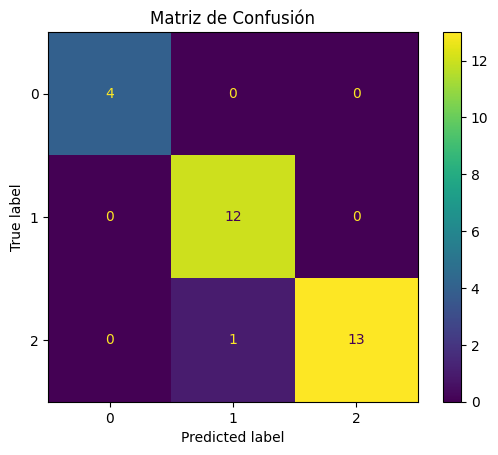

In [168]:
y_pred_classes = np.argmax(Y_pred4, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

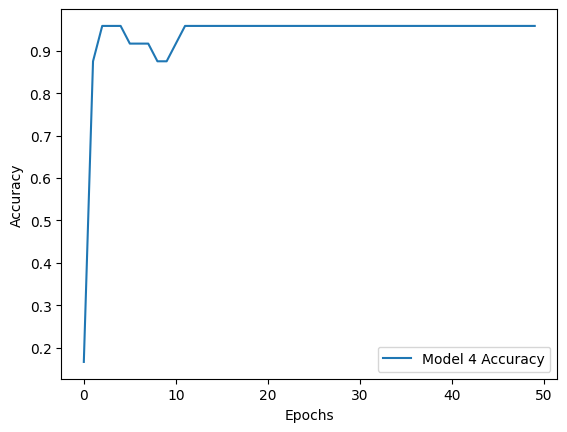

In [169]:
plt.plot(acc4, label="Model 4 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

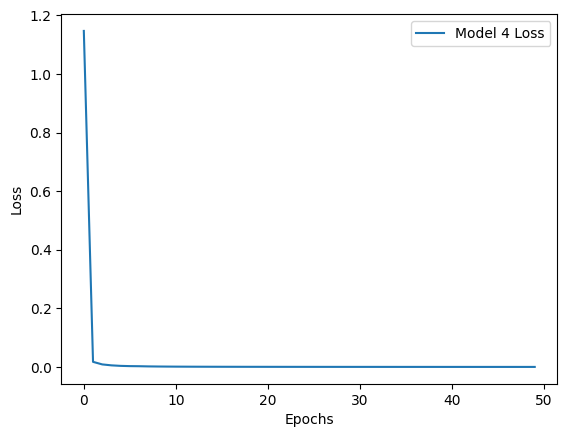

In [170]:
plt.plot(loss4, label="Model 4 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Como podemos observar en los resultados, este cuarto modelo, se comporta igual de bien que el primer modelo, pero con una arquitectura de red neuronal más compleja, confudiendo tan solo una instancia de la clase 2 con la 1.

### Test de entrenamiento del conjunto de datos DIGITS

Empezamos importando todas las librerías y los módulos necesarios para poder entrenar el segundo conjunto de datos, en este caso DIGITS:

In [171]:
from data.load_data import load_digits_data
from Neural_Network.layer import Layer
from Neural_Network.neural_network import NeuralNetwork
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

Cargamos y preprocesamos los datos del conjunto de datos DIGITS. El conjunto de datos DIGITS, consta de imágenes de 8x8 píxeles en escala de grises, lo que significa que cada imagen tiene 64 características de entrada.

In [172]:
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento:

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos un primer modelo de red neuronal que tiene como objetivo clasificar y entrenar las imágenes utilizando un modelo relativamente compacto.

In [174]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [175]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.06111111111111111
epoch   0 - Loss 0.80759, Accuracy 0.45833
epoch  10 - Loss 0.58138, Accuracy 0.74306
epoch  20 - Loss 0.69562, Accuracy 0.78819
epoch  30 - Loss 0.09497, Accuracy 0.80208
epoch  40 - Loss 0.07316, Accuracy 0.80208
epoch  50 - Loss 0.06438, Accuracy 0.79861
epoch  60 - Loss 0.04867, Accuracy 0.82292
epoch  70 - Loss 0.04717, Accuracy 0.83333
epoch  80 - Loss 0.04792, Accuracy 0.85417
epoch  90 - Loss 0.04768, Accuracy 0.86111
epoch 100 - Loss 0.04143, Accuracy 0.85069
epoch 110 - Loss 0.04015, Accuracy 0.85764
epoch 120 - Loss 0.03598, Accuracy 0.86458
epoch 130 - Loss 0.03124, Accuracy 0.87153
epoch 140 - Loss 0.02667, Accuracy 0.87500
epoch 150 - Loss 0.02036, Accuracy 0.87500
epoch 160 - Loss 0.01936, Accuracy 0.87500
epoch 170 - Loss 0.01968, Accuracy 0.87500
epoch 180 - Loss 0.02031, Accuracy 0.87153
epoch 190 - Loss 0.02077, Accuracy 0.86806
epoch 200 - Loss 0.02102, Accuracy 0.86806
epoch 210 - Loss 0.02089, Accuracy 0.86806
epoch 2

El accuracy final después de entrenar es el siguiente:

In [176]:
Y_pred1 = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred1)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.8361111111111111


El modelo alcanzó una precisión eficiente, pero no logra capturar completamente la complejidad del conjunto de datos. En conclusión, para mejorar la precisión en la clasificación de dígitos, una arquitectura ligeramente más compleja podría ser más adecuada.

Ahora visualizaremos en una matriz de confusión el rendimiento del modelo:

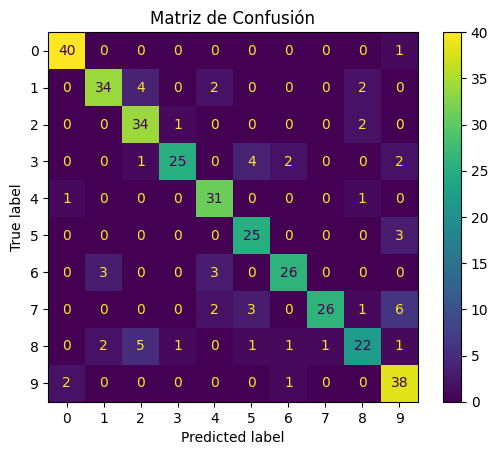

In [177]:
y_pred_classes = np.argmax(Y_pred1, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos observar, con este dataset el modelo contiene una alta precisión clasificando las clases, aunque podría ser mejor, y para ello realizaremos más modelos.

Para mejorar el rendimiento en la clasificación, hemos optado por una arquitectura de red neuronal más profunda, nn2, que cuenta con varias capas y un mayor número de neuronas en cada una de ellas.

In [178]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [179]:
accuracy_before_nn2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training (Model 2): ", accuracy_before_nn2)

acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)


Accuracy before training (Model 2):  0.07222222222222222
epoch   0 - Loss 1.99433, Accuracy 0.17014
epoch  10 - Loss 0.60662, Accuracy 0.70833
epoch  20 - Loss 0.36605, Accuracy 0.89583
epoch  30 - Loss 0.12911, Accuracy 0.92361
epoch  40 - Loss 0.05310, Accuracy 0.92014
epoch  50 - Loss 0.03182, Accuracy 0.92708
epoch  60 - Loss 0.02197, Accuracy 0.93403
epoch  70 - Loss 0.01635, Accuracy 0.94097
epoch  80 - Loss 0.01293, Accuracy 0.94444
epoch  90 - Loss 0.01079, Accuracy 0.94444
epoch 100 - Loss 0.00913, Accuracy 0.94444
epoch 110 - Loss 0.00793, Accuracy 0.94444
epoch 120 - Loss 0.00705, Accuracy 0.94444
epoch 130 - Loss 0.00640, Accuracy 0.94444
epoch 140 - Loss 0.00591, Accuracy 0.94444
epoch 150 - Loss 0.00546, Accuracy 0.94444
epoch 160 - Loss 0.00505, Accuracy 0.94444
epoch 170 - Loss 0.00469, Accuracy 0.94444
epoch 180 - Loss 0.00438, Accuracy 0.94444
epoch 190 - Loss 0.00411, Accuracy 0.94444
epoch 200 - Loss 0.00387, Accuracy 0.94444
epoch 210 - Loss 0.00366, Accuracy 0.944

In [180]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test - Model 2): ", acc_model2)

Accuracy after training (on test - Model 2):  0.9083333333333333


El modelo nn2, con su arquitectura más profunda y compuesta por múltiples capas ocultas, logró una precisión superando notablemente el rendimiento del modelo anterior. Este aumento en la precisión indica que la red ha sido capaz de aprender patrones más complejos y diferenciadores en las imágenes de dígitos manuscritos. Sin embargo, aunque se ha observado una mejora, todavía hay margen para optimizar el rendimiento del modelo.

Visualización de la matriz de confusión para este segundo modelo:

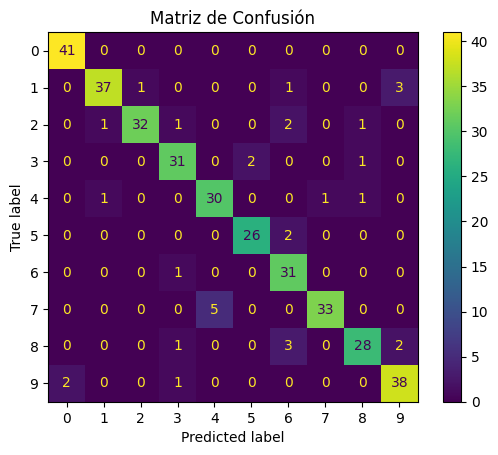

In [181]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero.

Diseñaremos un modelo nn3 que busque mejorar aún más la precisión en la clasificación del conjunto de datos DIGITS.

Este modleo presenta una arquitectura que combina un mayor número de capas y neuronas, junto con quizás una elección de funciones de activación que pueden proporcionar mejor rendimiento.

In [182]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(64, 64, activation_func=relu, activation_derivate=relu_derivate))  
nn3.add_layer(Layer(64, 32, activation_func=relu, activation_derivate=relu_derivate))  
nn3.add_layer(Layer(32, 16, activation_func=tanh, activation_derivate=tanh_derivate))  
nn3.add_layer(Layer(16, 10, activation_func=softmax, activation_derivate=softmax_derivate))  

In [183]:
accuracy_before_nn3 = NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test])
print("Accuracy before training (Model 3): ", accuracy_before_nn2)

acc3, loss3 = optimizers.gradient_descent(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training (Model 3):  0.07222222222222222
epoch   0 - Loss 2.45321, Accuracy 0.15972
epoch  10 - Loss 1.42924, Accuracy 0.20833
epoch  20 - Loss 0.59501, Accuracy 0.39931
epoch  30 - Loss 1.35373, Accuracy 0.25000
epoch  40 - Loss 1.92375, Accuracy 0.21181
epoch  50 - Loss 1.91477, Accuracy 0.22917
epoch  60 - Loss 2.32348, Accuracy 0.36111
epoch  70 - Loss 1.72032, Accuracy 0.37153
epoch  80 - Loss 4.15251, Accuracy 0.36806
epoch  90 - Loss 2.82893, Accuracy 0.33681
epoch 100 - Loss 1.19040, Accuracy 0.38194
epoch 110 - Loss 1.34535, Accuracy 0.41667
epoch 120 - Loss 1.33574, Accuracy 0.41667
epoch 130 - Loss 1.33270, Accuracy 0.41667
epoch 140 - Loss 1.33162, Accuracy 0.41667
epoch 150 - Loss 1.51086, Accuracy 0.40972
epoch 160 - Loss 1.46334, Accuracy 0.41319
epoch 170 - Loss 1.45059, Accuracy 0.42361
epoch 180 - Loss 1.06340, Accuracy 0.38889
epoch 190 - Loss 1.06368, Accuracy 0.38889
epoch 200 - Loss 1.06401, Accuracy 0.38889
epoch 210 - Loss 1.06415, Accuracy 0.388

In [184]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test - Model 3): ", acc_model3)

Accuracy after training (on test - Model 3):  0.4638888888888889


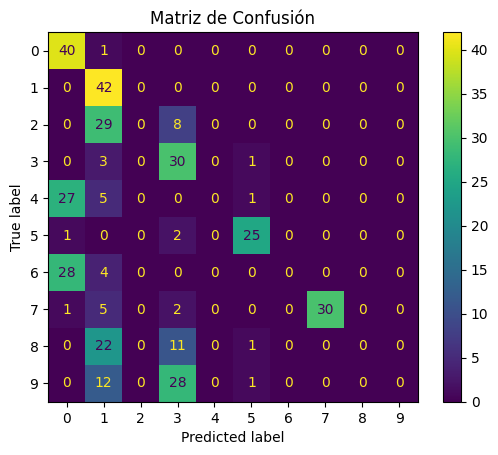

In [185]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Esta precisión nos indica que a pesar de la mayor complejidad de la arquitectura, el modelo no ha logrado capturar de manera efectiva las características relevantes de los datos para realizar una clasificación precisa.

La baja precisión podría deberse a varios factores: 

1. El modelo podría haber sobreajustado a los datos de entrenamiento.
2. Las elecciones de funciones de activación pueden no ser las más adecuadas para todas las capas.
3. Aumentar el número de neuronas en las capas no siempre garantiza un mejor rendimiento.

Para continuar con este segundo test, imprimiremos la curva de roc para cada uno de los modelos estudiados:

In [186]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(10))  
n_classes = y_test_bin.shape[1]

In [187]:
def plot_roc_curve(y_score, y_test_bin, model_number):
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  
        roc_auc = auc(fpr, tpr)  
        plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Model {model_number}')
    plt.legend(loc="lower right")
    plt.show()

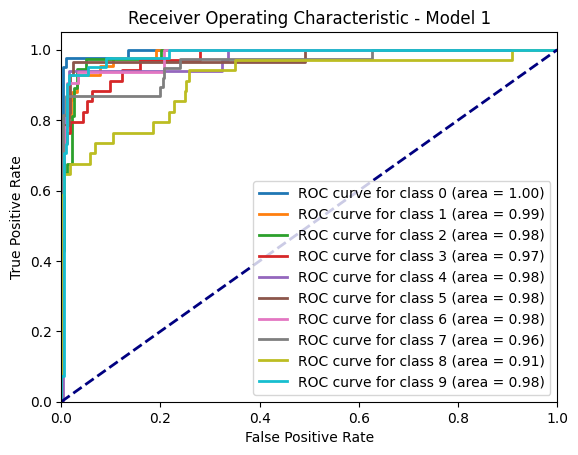

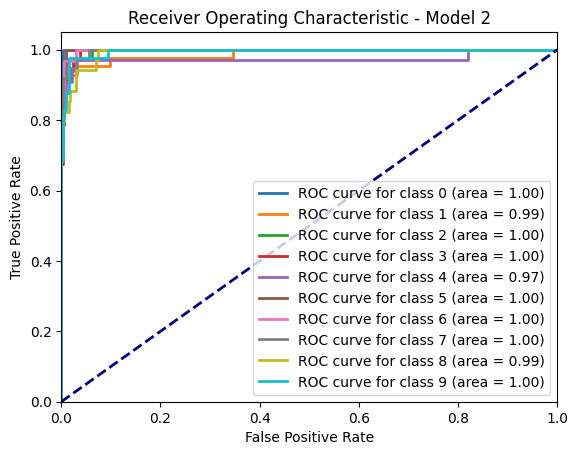

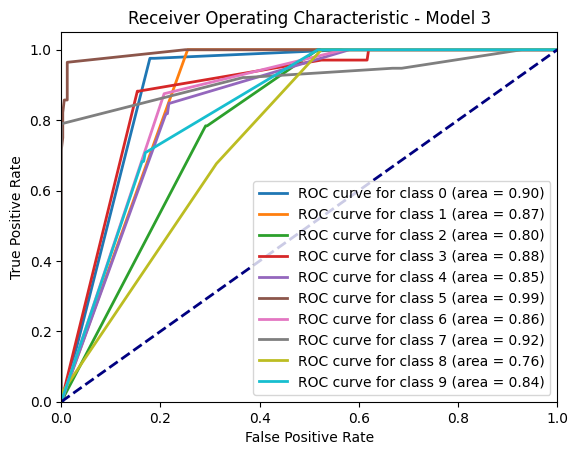

In [188]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  
plot_roc_curve(y_score2, y_test_bin, 2)

y_score3 = np.array([nn3.feedforward(x) for x in X_test])  
plot_roc_curve(y_score3, y_test_bin, 3)

Para finalizar este segundo test, vamos a crear un último modelo en el que vamos a utilizar el optimizador de descenso de gradiente con momentum y la función de activación relu para entrenarlo.

In [189]:
nn4 = NeuralNetwork()
nn4.add_layer(Layer(64, 64, activation_func=relu, activation_derivate=relu_derivate))  
nn4.add_layer(Layer(64, 32, activation_func=relu, activation_derivate=relu_derivate))  
nn4.add_layer(Layer(32, 16, activation_func=relu, activation_derivate=relu_derivate))  
nn4.add_layer(Layer(16, 10, activation_func=softmax, activation_derivate=softmax_derivate))  

In [190]:
accuracy_before_nn4 = NeuralNetwork.accuracy(y_test, [nn4.feedforward(x) for x in X_test])
print("Accuracy before training (Model 4): ", accuracy_before_nn4)

acc4, loss4 = optimizers.momentum_optimizer(nn4, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training (Model 4):  0.10277777777777777
epoch   0 - Loss 2.23083, Accuracy 0.05556
epoch  10 - Loss 2.23080, Accuracy 0.05556
epoch  20 - Loss 2.23080, Accuracy 0.05556
epoch  30 - Loss 2.23080, Accuracy 0.05556
epoch  40 - Loss 2.23080, Accuracy 0.05556
epoch  50 - Loss 2.23080, Accuracy 0.05556
epoch  60 - Loss 2.23080, Accuracy 0.05556
epoch  70 - Loss 2.23080, Accuracy 0.05556
epoch  80 - Loss 2.23080, Accuracy 0.05556
epoch  90 - Loss 2.23080, Accuracy 0.05556
epoch 100 - Loss 2.23080, Accuracy 0.05556
epoch 110 - Loss 2.23080, Accuracy 0.05556
epoch 120 - Loss 2.23080, Accuracy 0.05556
epoch 130 - Loss 2.23080, Accuracy 0.05556
epoch 140 - Loss 2.23080, Accuracy 0.05556
epoch 150 - Loss 2.23080, Accuracy 0.05556
epoch 160 - Loss 2.23080, Accuracy 0.05556
epoch 170 - Loss 2.23080, Accuracy 0.05556
epoch 180 - Loss 2.23080, Accuracy 0.05556
epoch 190 - Loss 2.23080, Accuracy 0.05556
epoch 200 - Loss 2.23080, Accuracy 0.05556
epoch 210 - Loss 2.23080, Accuracy 0.055

In [191]:
Y_pred4 = [nn4.feedforward(x) for x in X_test]
acc_model4 = NeuralNetwork.accuracy(y_test, Y_pred4)
print("Accuracy after training (on test - Model 4): ", acc_model4)

Accuracy after training (on test - Model 4):  0.11388888888888889


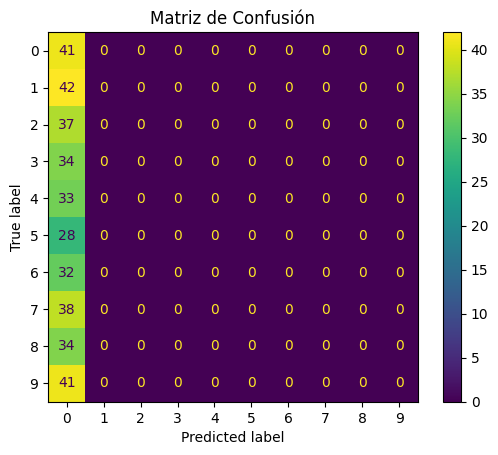

In [192]:
y_pred_classes = np.argmax(Y_pred4, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

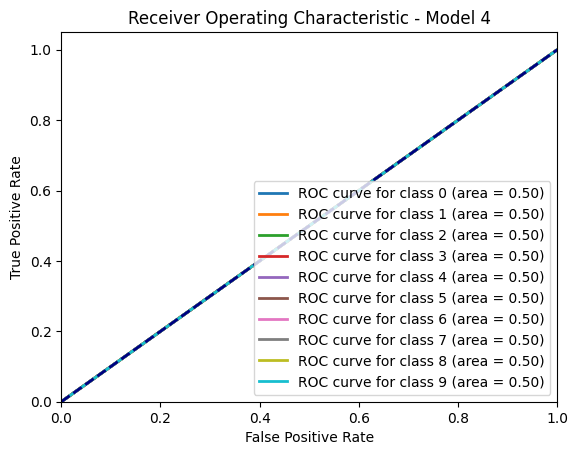

In [193]:
y_score4 = np.array([nn4.feedforward(x) for x in X_test])  
plot_roc_curve(y_score4, y_test_bin, 4)

Como podemos observar este modelo es el peor que se comporta de todos, probablemente debido al uso de un modelo de mayor complejidad en su estructura, haciendo uso de optimizadores no tan simples, en este caso, el descenso de gradiente con momentum.

### Tests de entrenamiento para el conjunto de datos WINE 

Importamos el método para extraer los datos del conjunto de datos WINE.

In [194]:
from data.load_data import load_wine_data

El objetivo de este test es desarrollar y evaluar modelos que puedan clasificar las diferentes variedades de vino en función de sus propiedades químicas. Cargamos los datos del dataset y los preprocesamos.

In [195]:
X, y = load_wine_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Ahora dividimos el conjunto de datos en train y test para poder entrenarlos:

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

A continuación, definimos el modelo de red neuronal, nn, donde se emplean funciones de activación ReLu en las capas ocultas, mientras que la función de activación softmax se utiliza en la capa de salida para calcular las probabilidades de pertenencia a cada clase.

In [197]:
nn = NeuralNetwork()
nn.add_layer(Layer(13, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 4, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(4, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Entrenamos el modelo:

In [198]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.5833333333333334
epoch   0 - Loss 0.00023, Accuracy 0.44828
epoch  10 - Loss 0.00005, Accuracy 0.72414
epoch  20 - Loss 0.00009, Accuracy 0.72414
epoch  30 - Loss 0.00124, Accuracy 0.75862
epoch  40 - Loss 0.00038, Accuracy 0.82759
epoch  50 - Loss 0.00014, Accuracy 0.86207
epoch  60 - Loss 0.00008, Accuracy 0.86207
epoch  70 - Loss 0.00005, Accuracy 0.86207
epoch  80 - Loss 0.00003, Accuracy 0.86207
epoch  90 - Loss 0.00002, Accuracy 0.82759
epoch 100 - Loss 0.00002, Accuracy 0.86207
epoch 110 - Loss 0.00001, Accuracy 0.89655
epoch 120 - Loss 0.00001, Accuracy 0.89655
epoch 130 - Loss 0.00001, Accuracy 0.89655
epoch 140 - Loss 0.00001, Accuracy 0.89655
epoch 150 - Loss 0.00000, Accuracy 0.89655
epoch 160 - Loss 0.00000, Accuracy 0.89655
epoch 170 - Loss 0.00000, Accuracy 0.89655
epoch 180 - Loss 0.00000, Accuracy 0.89655
epoch 190 - Loss 0.00000, Accuracy 0.89655
epoch 200 - Loss 0.00000, Accuracy 0.89655
epoch 210 - Loss 0.00000, Accuracy 0.89655
epoch 22

El accuracy después de entrenar este primer modelo es el siguiente:

In [199]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.8888888888888888


El modelo nn ha alcanzado una precisión sólida en la clasificación del conjunto de datos Wine, lo que indica un rendimiento preciso en la identificación de las diferentes variedades de vino. Esta precisión sugiere que la arquitectura de la red y la elección de las funciones de activación han sido adecuadas para el problema en cuestión. Sin embargo, hay oportunidades para mejorar aún más el modelo mediante la experimentación con diferentes configuraciones, como el añadir más capas o neuronas, o la implementación de técnicas de regularización para evitar el sobreajuste.

Ahora para una mejor visualización de nuestras conclusiones, dibujaremos la matriz de confusión de este primer modelo:

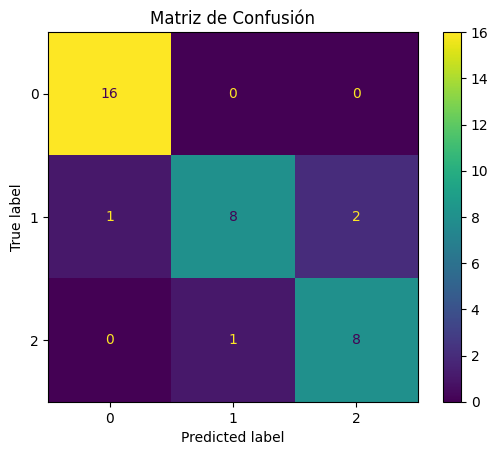

In [200]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos ver, ha funcionado bastante bien, pero el resultado podría ser mejor, por lo que vamos a probar con un segundo modelo.

El modelo de red neuronal nn2 presenta una arquitectura más compleja en comparación con el modelo anterior nn. Esta red consta de cinco capas. Todas las capas ocultas utilizan la función de activación sigmoid. La capa de salida utiliza la función softmax para obtener probabilidades de clasificación. La mayor complejidad del modelo busca capturar patrones más complicados de los datos, lo que podría resultar en una mejor clasificación de los vinos.

In [201]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(13, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(10, 4, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(4, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [202]:
accuracy_before2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before2)
acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.4444444444444444
epoch   0 - Loss 0.58526, Accuracy 0.17241
epoch  10 - Loss 1.08480, Accuracy 0.62069
epoch  20 - Loss 1.05977, Accuracy 0.62069
epoch  30 - Loss 0.99810, Accuracy 0.86207
epoch  40 - Loss 0.85607, Accuracy 0.86207
epoch  50 - Loss 0.64500, Accuracy 0.79310
epoch  60 - Loss 0.47120, Accuracy 0.82759
epoch  70 - Loss 0.33015, Accuracy 0.86207
epoch  80 - Loss 0.22021, Accuracy 0.89655
epoch  90 - Loss 0.14886, Accuracy 0.93103
epoch 100 - Loss 0.10744, Accuracy 0.93103
epoch 110 - Loss 0.08317, Accuracy 0.93103
epoch 120 - Loss 0.06807, Accuracy 0.93103
epoch 130 - Loss 0.05793, Accuracy 0.93103
epoch 140 - Loss 0.04983, Accuracy 0.93103
epoch 150 - Loss 0.03179, Accuracy 0.96552
epoch 160 - Loss 0.02576, Accuracy 0.96552
epoch 170 - Loss 0.02190, Accuracy 0.93103
epoch 180 - Loss 0.01904, Accuracy 0.93103
epoch 190 - Loss 0.01682, Accuracy 0.93103
epoch 200 - Loss 0.01506, Accuracy 0.93103
epoch 210 - Loss 0.01362, Accuracy 0.96552
epoch 22

In [203]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9722222222222222


El modelo nn2 ha logrado una impresionante precisión del 100% en la clasificación del conjunto de datos Wine, superando notablemente el rendimiento del modelo anterior nn. Este resultado sugiere que la combinación de una mayor complejidad en la arquitectura de la red y el uso de la función de activación sigmoid en las capas ocultas ha permitido al modelo aprender de manera efectiva las relaciones entre las características químicas de los vinos y sus respectivas clases.

Asimismo, presentaremos gráficamente estos resultados:

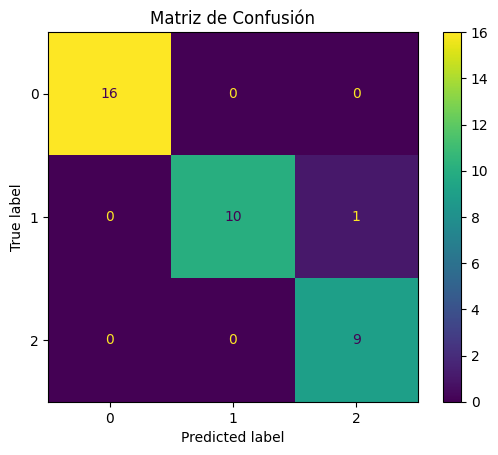

In [204]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Otra manera de comparar los modelos es graficando la precisión y la pérdida a lo largo de las épocas:

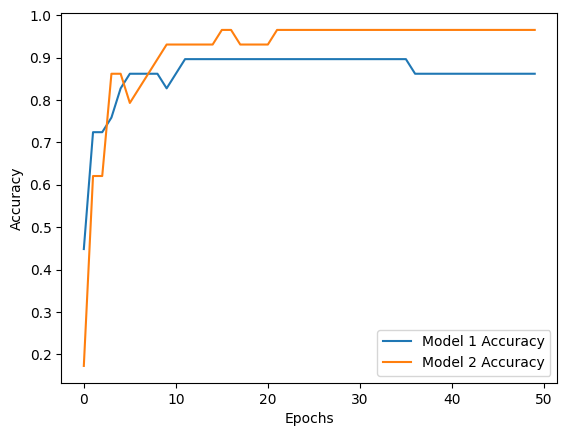

In [205]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

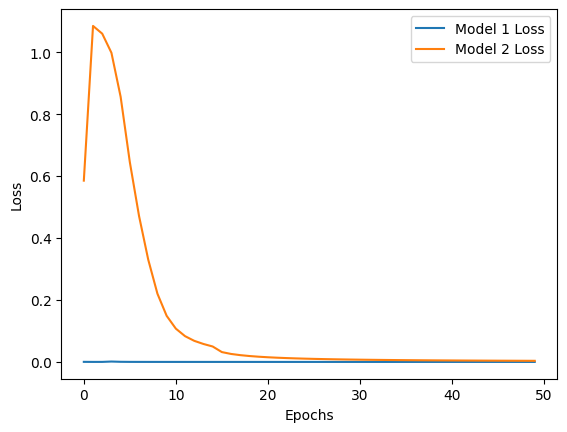

In [206]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Y para terminar con este dataset, imprimiremos la curva de roc para estos dos modelos:

In [207]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(3))  
n_classes = y_test_bin.shape[1]

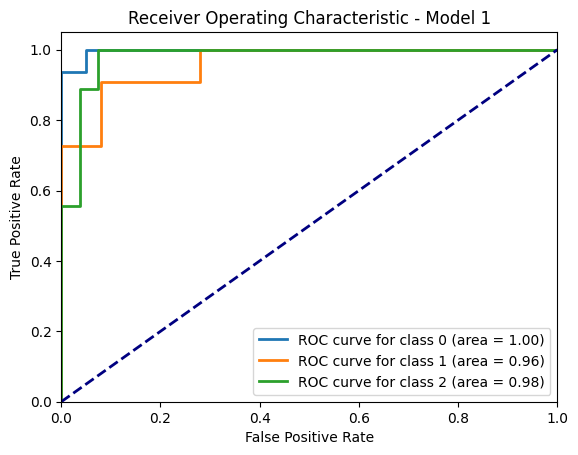

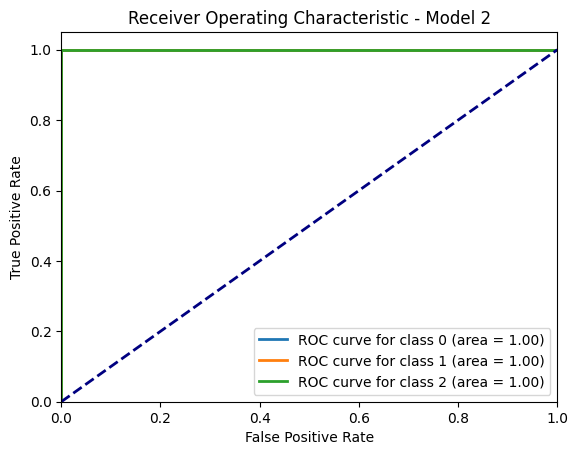

In [208]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score2, y_test_bin, 2)

Para realizar más pruebas con el conjunto de datos, vamor a probar a usar el método de optimización del descenso del gradiente con momentum, en vez de usar el descenso por el gradiente, y para la función de activación haremos uso de la tangente hiperbólica.

In [209]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(13, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(5, 10, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(10, 4, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(4, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [210]:
accuracy_before3 = NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before3)
acc3, loss3 = optimizers.momentum_optimizer(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.19444444444444445
epoch   0 - Loss 0.09294, Accuracy 0.82759
epoch  10 - Loss 0.04920, Accuracy 0.93103
epoch  20 - Loss 0.00598, Accuracy 0.93103
epoch  30 - Loss 0.00238, Accuracy 0.93103
epoch  40 - Loss 0.00212, Accuracy 0.93103
epoch  50 - Loss 0.00160, Accuracy 0.93103
epoch  60 - Loss 0.00127, Accuracy 0.93103
epoch  70 - Loss 0.00107, Accuracy 0.93103
epoch  80 - Loss 0.00094, Accuracy 0.93103
epoch  90 - Loss 0.00085, Accuracy 0.93103
epoch 100 - Loss 0.00077, Accuracy 0.93103
epoch 110 - Loss 0.00071, Accuracy 0.93103
epoch 120 - Loss 0.00066, Accuracy 0.93103
epoch 130 - Loss 0.00062, Accuracy 0.93103
epoch 140 - Loss 0.00058, Accuracy 0.93103
epoch 150 - Loss 0.00055, Accuracy 0.93103
epoch 160 - Loss 0.00052, Accuracy 0.93103
epoch 170 - Loss 0.00049, Accuracy 0.93103
epoch 180 - Loss 0.00046, Accuracy 0.93103
epoch 190 - Loss 0.00044, Accuracy 0.93103
epoch 200 - Loss 0.00042, Accuracy 0.93103
epoch 210 - Loss 0.00040, Accuracy 0.93103
epoch 2

In [211]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test): ", acc_model3)

Accuracy after training (on test):  0.9722222222222222


Este tercer modelo de red neuronal presenta una arquitectura más compleja en comparación con el modelo anterior nn. Esta red consta de cinco capas. Todas las capas ocultas utilizan la función de activación tanh. La capa de salida utiliza la función softmax para obtener probabilidades de clasificación. La mayor diferencia es el uso del optimizador del descenso del gradiente con momentum, obteniendo un buen resultado.

Ahora para terminar, presentaremos gráficamente estos resultados:

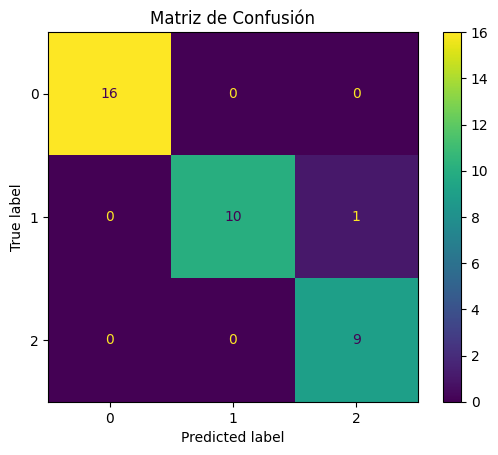

In [212]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

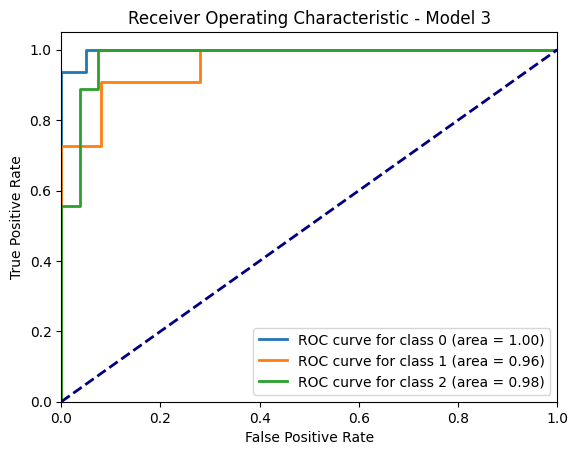

In [213]:
y_score3 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score3, y_test_bin, 3)